# Naive Bayes

1) Bernoulli Classification : X[0,1], y[0,1]

2) Mulinomial Classification : X[0,1],[0,1], ... , y[0,1]

3) Gaussian Classification : X(continuous), y[0,1]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
simple_train = ['call you tonight',
               'Call me a cab',
                'please call me please....']
simple_test = ['please don\'t call me']

In [3]:
pd.DataFrame(simple_train)

,0
0,call you tonight
1,Call me a cab
2,please call me please....


In [4]:
from sklearn.feature_extraction.text import CountVectorizer # 단어의 count 파악, 대문자를 소문자로 변경
vect = CountVectorizer().fit(simple_train) # simple_train으로 modeling
print('feature names : ', vect.get_feature_names()) # simple_train에 있는 단어 정렬
simple_train_dtm = vect.transform(simple_train) # 단어를 숫자로 변환
print('train convert names to number')
print(simple_train_dtm.toarray())

feature names :  ['cab', 'call', 'me', 'please', 'tonight', 'you']
train convert names to number
[[0 1 0 0 1 1]
 [1 1 1 0 0 0]
 [0 1 1 2 0 0]]


In [5]:
print(simple_train_dtm) # Compressed Sparse Row Matrix(CSR matrix)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [6]:
simple_test_dtm = vect.transform(simple_test)
print('test convert names to number')
print(simple_test_dtm.toarray())

test convert names to number
[[0 1 1 1 0 0]]


## Distinguish between spam and ham

In [7]:
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
sms = pd.read_table(url, header=None, names=['label', 'messages'])

In [8]:
pd.DataFrame(sms)

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# label을 숫자로 표현
label_class = []
for label in sms.label:
    if label == 'ham':
        label_class.append(0)
    else :
        label_class.append(1)
sms['label_class'] = pd.DataFrame(label_class)

In [10]:
pd.DataFrame(sms)

,label,messages,label_class
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [11]:
X = sms.messages
y = sms.label_class
print('before split : ', X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('after split : ', X_train.shape, X_test.shape)

before split :  (5572,)
after split :  (4179,) (1393,)


In [12]:
vect = CountVectorizer()
vect.fit(X_train) # modeling
X_train_dtm = vect.transform(X_train) # convert X_train data to numbers
X_test_dtm = vect.transform(X_test) # convert X_test data to numbers

In [13]:
# Use Multinomial Classification
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train_dtm, y_train)
y_pred = nb.predict(X_test_dtm)
print('training accuracy : ', nb.score(X_train_dtm, y_train))
print('testing accuracy : ', nb.score(X_test_dtm, y_test))

training accuracy :  0.9935391241923905
testing accuracy :  0.9885139985642498


In [14]:
# Test accuracy use metrics
from sklearn import metrics
metrics.accuracy_score(y_pred, y_test)

0.9885139985642498

In [15]:
# Check confusion matrix
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_pred) # tn, fp, fn, tp
# ham = 0, spam = 1

array([[1206,    2],
       [  14,  171]], dtype=int64)

In [16]:
X_test[(y_pred == 1) & (y_test == 0)] # false positive

4382               Mathews or tait or edwards or anderson
1290    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
Name: messages, dtype: object

In [17]:
X_test[(y_pred == 0) & (y_test == 1)] # false negative

684     Hi I'm sue. I am 20 years old and work as a la...
731     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
2575    Your next amazing xxx PICSFREE1 video will be ...
1940    More people are dogging in your area now. Call...
751     Do you realize that in about 40 years, we'll h...
4213    Missed call alert. These numbers called but le...
4298    thesmszone.com lets you send free anonymous an...
3864    Oh my god! I've found your number again! I'm s...
5449    Latest News! Police station toilet stolen, cop...
1430    For sale - arsenal dartboard. Good condition b...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
3460    Not heard from U4 a while. Call me now am here...
2823    ROMCAPspam Everyone around should be respondin...
2402    Babe: U want me dont u baby! Im nasty and have...
Name: messages, dtype: object

In [18]:
# 0과 1로 결정될 확률
pd.DataFrame(nb.predict_proba(X_test_dtm))

,0,1
0,1.000000e+00,2.093787e-15
1,4.008989e-02,9.599101e-01
2,1.000000e+00,4.925385e-10
3,9.974716e-01,2.528391e-03
4,9.999994e-01,6.137252e-07
...,...,...
1388,1.000000e+00,8.698462e-09
1389,1.377085e-10,1.000000e+00
1390,3.230136e-03,9.967699e-01
1391,9.988273e-01,1.172675e-03


 ## Gaussain Classfication

In [19]:
import mglearn
X, y = mglearn.datasets.make_forge()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X, y)

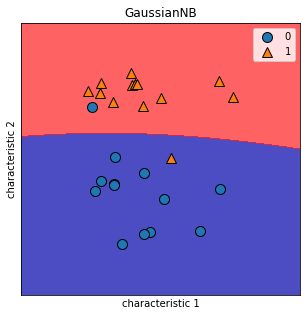

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
# !plots check!
mglearn.plots.plot_2d_separator(gnb, X, fill = True, alpha = 0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
axes.set_title(gnb.__class__.__name__)
axes.set_xlabel('characteristic 1')
axes.set_ylabel('characteristic 2')
axes.legend()

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [23]:
X = cancer.data
y = cancer.target
print('before split : ', X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.5)
print('after split : ', X_train.shape, X_test.shape)

before split :  (569, 30)
after split :  (284, 30) (285, 30)


In [24]:
gnb = GaussianNB().fit(X_train, y_train)
print('training accruacy : ', gnb.score(X_train, y_train))
print('testing accruacy : ', gnb.score(X_test, y_test))

training accruacy :  0.9507042253521126
testing accruacy :  0.9368421052631579


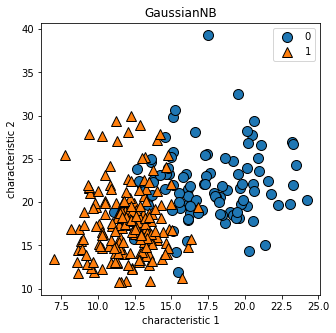

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
mglearn.discrete_scatter(X_test[:, 0], X_test[:,1], y_test)
axes.set_title(gnb.__class__.__name__)
axes.set_xlabel('characteristic 1')
axes.set_ylabel('characteristic 2')
axes.legend()

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()

In [27]:
X = iris.data
y = iris.target
print('before split : ', X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.6)
print('after split : ', X_train.shape, X_test.shape)

before split :  (150, 4)
after split :  (60, 4) (90, 4)


In [28]:
gnb = GaussianNB().fit(X_train, y_train)
print('training accuracy : ', gnb.score(X_train, y_train))
print('testing accuracy : ', gnb.score(X_test, y_test))

training accuracy :  0.9666666666666667
testing accuracy :  0.9444444444444444


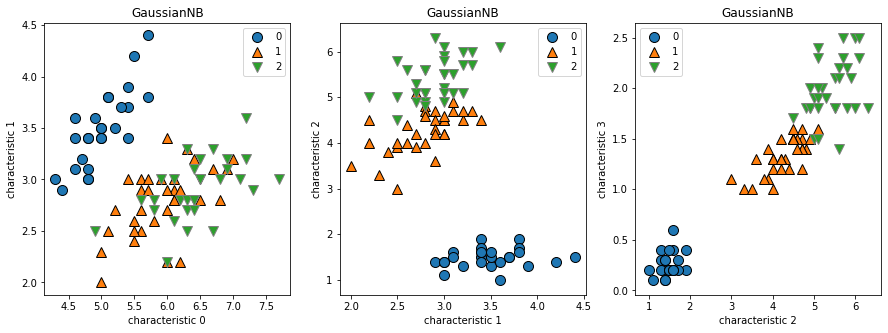

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for num, ax in zip(range(3), axes):
    mglearn.discrete_scatter(X_test[:,num], X_test[:,num+1], y_test, ax = ax)
    ax.set_title(gnb.__class__.__name__)
    ax.set_xlabel('characteristic {}'.format(num))
    ax.set_ylabel('characteristic {}'.format(num+1))
    ax.legend()